## Cardio Facility

In [1]:
# import base packages into the namespace for this program
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import seaborn as sns  # for plotting
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from sklearn.preprocessing import MinMaxScaler

In [7]:
# import dataset
cardio_facility = pd.read_csv('cardio_facility_combine.csv', sep = ',')  

In [8]:
#check dataframe
cardio_facility.head()

,id,age_days,age_years,gender,height_cm,weight_kg,BMI,ap_hi,ap_lo,cholesterol,...,cardio,LATITUDE,LONGITUDE,ZIP,FACILITY_NAME,ADDRESS,CITY,STATE,DESCRIPTION,FACILITY_TYPE
0,0,18393,50,male,168,62.0,21.967120,110,80,1,...,0,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
1,1,20228,55,female,156,85.0,34.927679,140,90,3,...,1,21.303907,-157.786630,96816.0,PALOLO CHINESE HOME,2459 10TH†AVENUE,HONOLULU,HI,NURSING HOME,NURSING_HOME
2,2,18857,51,female,165,64.0,23.507805,130,70,3,...,1,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
3,3,17623,48,male,169,82.0,28.710479,150,100,1,...,1,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
4,4,17474,47,female,156,56.0,23.011177,100,60,1,...,0,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB


In [9]:
#total number of NaN values in each column
print('The total number of NaN values in the cardio facility set is:\n', cardio_facility.isnull().sum())

The total number of NaN values in the cardio facility set is:
 id                   0
age_days             0
age_years            0
gender               0
height_cm            0
weight_kg            0
BMI                  0
ap_hi                0
ap_lo                0
cholesterol          0
gluc                 0
smoke                0
alcohol              0
active               0
cardio               0
LATITUDE             0
LONGITUDE            0
ZIP                 11
FACILITY_NAME      255
ADDRESS            381
CITY               255
STATE              255
DESCRIPTION      10892
FACILITY_TYPE      255
dtype: int64


In [14]:
#drop rows missing facility type
cardio_facility_all = cardio_facility.dropna(subset=['FACILITY_TYPE'])


In [15]:
#total number of NaN values in each column
print('The total number of NaN values in the cardio facility set is:\n', cardio_facility_all.isnull().sum())

The total number of NaN values in the cardio facility set is:
 id                   0
age_days             0
age_years            0
gender               0
height_cm            0
weight_kg            0
BMI                  0
ap_hi                0
ap_lo                0
cholesterol          0
gluc                 0
smoke                0
alcohol              0
active               0
cardio               0
LATITUDE             0
LONGITUDE            0
ZIP                  0
FACILITY_NAME        0
ADDRESS            126
CITY                 0
STATE                0
DESCRIPTION      10637
FACILITY_TYPE        0
dtype: int64


In [16]:
cardio_facility_all.head()

,id,age_days,age_years,gender,height_cm,weight_kg,BMI,ap_hi,ap_lo,cholesterol,...,cardio,LATITUDE,LONGITUDE,ZIP,FACILITY_NAME,ADDRESS,CITY,STATE,DESCRIPTION,FACILITY_TYPE
0,0,18393,50,male,168,62.0,21.967120,110,80,1,...,0,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
1,1,20228,55,female,156,85.0,34.927679,140,90,3,...,1,21.303907,-157.786630,96816.0,PALOLO CHINESE HOME,2459 10TH†AVENUE,HONOLULU,HI,NURSING HOME,NURSING_HOME
2,2,18857,51,female,165,64.0,23.507805,130,70,3,...,1,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
3,3,17623,48,male,169,82.0,28.710479,150,100,1,...,1,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB
4,4,17474,47,female,156,56.0,23.011177,100,60,1,...,0,42.310594,-84.016571,48118.0,CHELSEA COMMUNITY HOSPITAL,775 S MAIN,CHELSEA,MI,NaN,INPATIENT_REHAB


In [17]:
#counting the number of cardio patients
pd.pivot_table(cardio_facility_all, index=['cardio'], values=['id'], aggfunc='count')

,id
cardio,
0,34631
1,33861


In [19]:
#counting the number of cardio patients
pd.pivot_table(cardio_facility_all, index=['cardio', 'FACILITY_TYPE'], values=['id'], aggfunc='count')

id
cardio FACILITY_TYPE         
0      HOSPITAL          8958
       INPATIENT_REHAB   6321
       NURSING_HOME     12433
       NYC_HOS            103
       URGENT_CARE       5570
       VETERANS          1246
1      HOSPITAL          5956
       INPATIENT_REHAB   4316
       NURSING_HOME     18822
       NYC_HOS             69
       URGENT_CARE       3870
       VETERANS           828

In [20]:
#counting the number of cardio patients
pd.pivot_table(cardio_facility_all, index=['FACILITY_TYPE', 'cardio'], values=['id'], aggfunc='count')

id
FACILITY_TYPE   cardio       
HOSPITAL        0        8958
                1        5956
INPATIENT_REHAB 0        6321
                1        4316
NURSING_HOME    0       12433
                1       18822
NYC_HOS         0         103
                1          69
URGENT_CARE     0        5570
                1        3870
VETERANS        0        1246
                1         828

In [21]:
#counting the number of cardio patients
facility = pd.pivot_table(cardio_facility_all, index=['FACILITY_TYPE', 'cardio'], values=['id'], aggfunc='count')

In [22]:
#check results
facility

id
FACILITY_TYPE   cardio       
HOSPITAL        0        8958
                1        5956
INPATIENT_REHAB 0        6321
                1        4316
NURSING_HOME    0       12433
                1       18822
NYC_HOS         0         103
                1          69
URGENT_CARE     0        5570
                1        3870
VETERANS        0        1246
                1         828

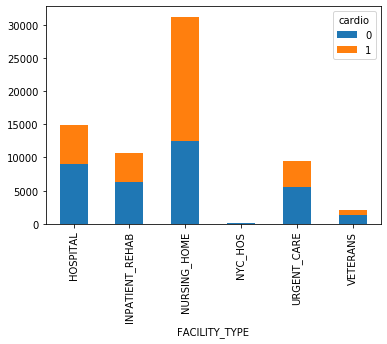

In [30]:
#https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart
#exploring a basic stacked bar chart

cardio_facility_all.groupby('FACILITY_TYPE')['cardio']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

In [26]:
#group individuals by the type of FACILITY_TYPE that they are associated with
#within the facility type, then group individuals by cardiovascular disease
#provide the value counts for each group
test = cardio_facility_all.groupby('FACILITY_TYPE')['cardio'].value_counts()

In [35]:
#check results
test

FACILITY_TYPE    cardio
HOSPITAL         0          8958
                 1          5956
INPATIENT_REHAB  0          6321
                 1          4316
NURSING_HOME     1         18822
                 0         12433
NYC_HOS          0           103
                 1            69
URGENT_CARE      0          5570
                 1          3870
VETERANS         0          1246
                 1           828
Name: cardio, dtype: int64

In [44]:
#the prior result worked as desired
#now specify the name of the value counts as "Count"
#and reset the index 
test2 = cardio_facility_all.groupby('FACILITY_TYPE')['cardio'].value_counts().reset_index(name='Count')

#check result
test2

,FACILITY_TYPE,cardio,Count
0,HOSPITAL,0,8958
1,HOSPITAL,1,5956
2,INPATIENT_REHAB,0,6321
3,INPATIENT_REHAB,1,4316
4,NURSING_HOME,1,18822
5,NURSING_HOME,0,12433
6,NYC_HOS,0,103
7,NYC_HOS,1,69
8,URGENT_CARE,0,5570
9,URGENT_CARE,1,3870


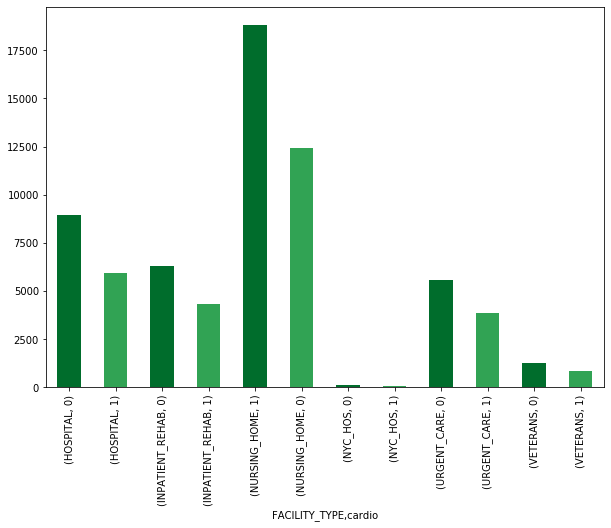

In [37]:
#This is just a simple bar chart of the test dataframe to see how things look
colors = ["#006D2C", "#31A354"]
test.plot.bar(stacked=True, color=colors, figsize=(10,7))

In [31]:
#from the cardio_facility_all dataframe
#separate individuals into two groups
#one with cardio disease and the other without
cardio_no = cardio_facility_all[cardio_facility_all['cardio']==0]
cardio_yes = cardio_facility_all[cardio_facility_all['cardio']==1]

In [33]:
#provide value counts of each group by facility type
cardio_no_counts = cardio_no['FACILITY_TYPE'].value_counts()
cardio_yes_counts = cardio_yes['FACILITY_TYPE'].value_counts()

In [34]:
#check results
cardio_no_counts

NURSING_HOME       12433
HOSPITAL            8958
INPATIENT_REHAB     6321
URGENT_CARE         5570
VETERANS            1246
NYC_HOS              103
Name: FACILITY_TYPE, dtype: int64

In [65]:
#check results
cardio_yes_counts

NURSING_HOME       18822
HOSPITAL            5956
INPATIENT_REHAB     4316
URGENT_CARE         3870
VETERANS             828
NYC_HOS               69
Name: FACILITY_TYPE, dtype: int64

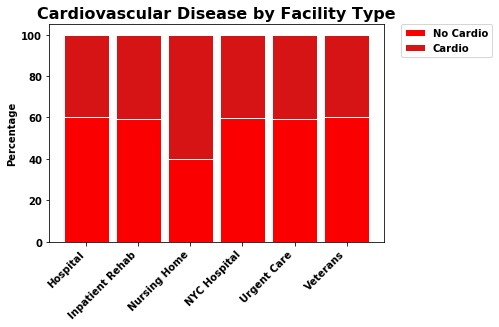

In [62]:
#Create stacked bar chart of individuals at each facility type
#Look at proportions of each group
#https://python-graph-gallery.com/13-percent-stacked-barplot/
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

#use the test2 dataframe to separate facilities by cardio disease 
cardio_0 = test2[test2['cardio']==0]
cardio_1 = test2[test2['cardio']==1]

# From raw value to percentage 
totals = [i+j for i,j in zip(cardio_0['Count'], cardio_1['Count'])]
greenBars = [i / j * 100 for i,j in zip(cardio_0['Count'], totals)]
orangeBars = [i / j * 100 for i,j in zip(cardio_1['Count'], totals)]
#blueBars = [i / j * 100 for i,j in zip(south17['Count'], totals)]
#purpleBars = [i / j * 100 for i,j in zip(west17['Count'], totals)]

# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# plot
barWidth = 0.85

names = ('Hospital', 'Inpatient Rehab', 'Nursing Home', 'NYC Hospital', 'Urgent Care', 'Veterans')
#since there are two groups of people (Cardio and No cardio)
#create the groups that will be stacked on each other
# Create 'green' Bars - people with No cardio
plt.bar(r, greenBars, color='#fb0000', edgecolor='white', width=barWidth)
# Create 'orange' Bars - people with cardio
plt.bar(r, orangeBars, bottom=greenBars, color='#d61415', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names, rotation=45, horizontalalignment="right")

 
# Show graphic
region = ['No Cardio', 'Cardio']
plt.legend(region,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Cardiovascular Disease by Facility Type',fontsize=16, fontweight='bold' )
plt.ylabel('Percentage', fontweight='bold')
plt.savefig('Cardio_facility_type_percent.pdf', bbox_inches="tight")
plt.show()


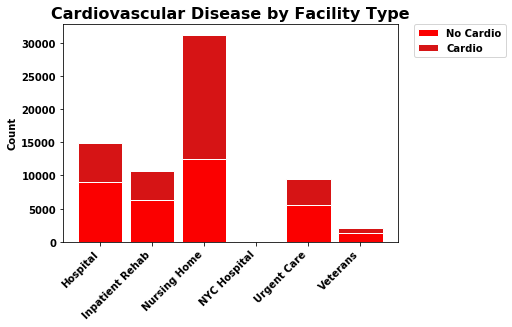

In [64]:
#stacked bar chart of value counts
    
    
# Heights of bars1 + bars2
bars = np.add(bars1, bars2)
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['Hospital', 'Inpatient Rehab', 'Nursing Home', 'NYC Hospital', 'Urgent Care', 'Veterans']
barWidth = 0.85
 
#since there are two groups of people (Cardio and No cardio)
#create the groups that will be stacked on each other
# Create bars1 - people with No cardio    
plt.bar(r, bars1, color='#fb0000', edgecolor='white', width=barWidth)
# Create second bars (middle), on top of the first ones - people with Cardio
plt.bar(r, bars2, bottom=bars1, color='#d61415', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, rotation=45, horizontalalignment="right")


# Show graphic
region = ['No Cardio', 'Cardio']
plt.legend(region,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Cardiovascular Disease by Facility Type',fontsize=16, fontweight='bold' )
plt.ylabel('Count', fontweight='bold')

plt.savefig('Cardio_facility_type_count.pdf', bbox_inches="tight")
plt.show()


In [100]:
#let's re-order the bars
#desiredorder = ['NURSING_HOME', 'HOSPITAL', 'INPATIENT_REHAB', 'URGENT_CARE', 'VETERANS', 'NYC_HOSPITAL']

#reorder the test2 by specifying the order of the index
test2_sorted = test2.reindex(index = [5,4,0,1,2,3,8,9,10,11,6,7])
test2_sorted

#drop the rows with NYC_HOS
test2_sorted = test2_sorted[test2_sorted['FACILITY_TYPE']!='NYC_HOS']
test2_sorted

,FACILITY_TYPE,cardio,Count
5,NURSING_HOME,0,12433
4,NURSING_HOME,1,18822
0,HOSPITAL,0,8958
1,HOSPITAL,1,5956
2,INPATIENT_REHAB,0,6321
3,INPATIENT_REHAB,1,4316
8,URGENT_CARE,0,5570
9,URGENT_CARE,1,3870
10,VETERANS,0,1246
11,VETERANS,1,828


In [139]:
cardio_facility_all_hos = cardio_facility_all.replace('NYC_HOS','HOSPITAL')
#now specify the name of the value counts as "Count"
#and reset the index 
test3 = cardio_facility_all_hos.groupby('FACILITY_TYPE')['cardio'].value_counts().reset_index(name='Count')
#test3

#let's re-order the bars
#desiredorder = ['NURSING_HOME', 'HOSPITAL', 'INPATIENT_REHAB', 'URGENT_CARE', 'VETERANS']

#reorder the test2 by specifying the order of the index
test3_sorted = test3.reindex(index = [5,4,0,1,2,3,6,7,8,9])
test3_sorted

#replace the rows with NYC_HOS with HOSPITAL
#df.replace(0, 5)
#test_hos_sorted = test3_sorted.replace('NYC_HOS','HOSPITAL')
#check result
#test_hos_sorted

,FACILITY_TYPE,cardio,Count
5,NURSING_HOME,0,12433
4,NURSING_HOME,1,18822
0,HOSPITAL,0,9061
1,HOSPITAL,1,6025
2,INPATIENT_REHAB,0,6321
3,INPATIENT_REHAB,1,4316
6,URGENT_CARE,0,5570
7,URGENT_CARE,1,3870
8,VETERANS,0,1246
9,VETERANS,1,828


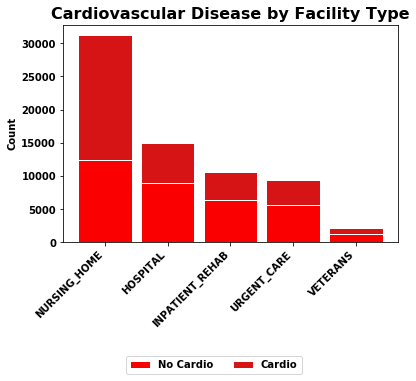

In [142]:
#stacked bar chart of sorted value counts
#legend below

cardio_0_sorted = test2_sorted[test2_sorted['cardio']==0]
cardio_1_sorted = test2_sorted[test2_sorted['cardio']==1]


bars1 = cardio_0_sorted['Count'].values
bars2 = cardio_1_sorted['Count'].values

    
# Heights of bars1 + bars2
bars = np.add(bars1, bars2)
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['NURSING_HOME', 'HOSPITAL', 'INPATIENT_REHAB', 'URGENT_CARE', 'VETERANS']
barWidth = 0.85
 
# Create first bars
plt.bar(r, bars1, color='#fb0000', edgecolor='white', width=barWidth)
# Create second bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#d61415', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, rotation=45, horizontalalignment="right")

# Show graphic
region = ['No Cardio', 'Cardio']
#plt.legend(region,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #original legend on right side
plt.legend(region,loc='upper center', bbox_to_anchor=(0.45, -0.5),fancybox=True, ncol=2) #legend below
plt.title('Cardiovascular Disease by Facility Type',fontsize=16, fontweight='bold' )
plt.ylabel('Count', fontweight='bold')
#plt.xlabel('Region')
plt.savefig('Cardio_facility_type_count_sorted_below.pdf', bbox_inches="tight")
plt.show()




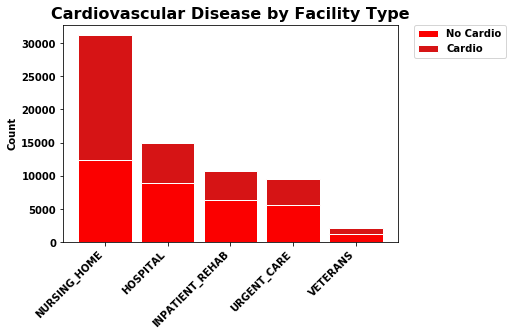

In [145]:
#stacked bar chart of sorted value counts
#legend on right side

cardio_0_sorted = test2_sorted[test2_sorted['cardio']==0]
cardio_1_sorted = test2_sorted[test2_sorted['cardio']==1]


bars1 = cardio_0_sorted['Count'].values
bars2 = cardio_1_sorted['Count'].values

    
# Heights of bars1 + bars2
bars = np.add(bars1, bars2)
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['NURSING_HOME', 'HOSPITAL', 'INPATIENT_REHAB', 'URGENT_CARE', 'VETERANS']
barWidth = 0.85
 
# Create first bars
plt.bar(r, bars1, color='#fb0000', edgecolor='white', width=barWidth)
# Create second bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#d61415', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, rotation=45, horizontalalignment="right")

# Show graphic
region = ['No Cardio', 'Cardio']
plt.legend(region,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #original legend on right side
#plt.legend(region,loc='upper center', bbox_to_anchor=(0.45, -0.5),fancybox=True, ncol=2) #legend below
plt.title('Cardiovascular Disease by Facility Type',fontsize=16, fontweight='bold' )
plt.ylabel('Count', fontweight='bold')
#plt.xlabel('Region')
plt.savefig('Cardio_facility_type_count_sorted_side.pdf', bbox_inches="tight")
plt.show()




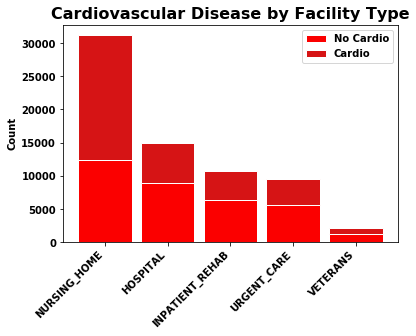

In [146]:
#stacked bar chart of sorted value counts
#legend on right side

cardio_0_sorted = test2_sorted[test2_sorted['cardio']==0]
cardio_1_sorted = test2_sorted[test2_sorted['cardio']==1]


bars1 = cardio_0_sorted['Count'].values
bars2 = cardio_1_sorted['Count'].values

    
# Heights of bars1 + bars2
bars = np.add(bars1, bars2)
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['NURSING_HOME', 'HOSPITAL', 'INPATIENT_REHAB', 'URGENT_CARE', 'VETERANS']
barWidth = 0.85
 
# Create first bars
plt.bar(r, bars1, color='#fb0000', edgecolor='white', width=barWidth)
# Create second bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#d61415', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, rotation=45, horizontalalignment="right")

# Show graphic
region = ['No Cardio', 'Cardio']
#plt.legend(region,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #original legend on right side
#plt.legend(region,loc='upper center', bbox_to_anchor=(0.45, -0.5),fancybox=True, ncol=2) #legend below
plt.legend(region)
plt.title('Cardiovascular Disease by Facility Type',fontsize=16, fontweight='bold' )
plt.ylabel('Count', fontweight='bold')
#plt.xlabel('Region')
plt.savefig('Cardio_facility_type_count_sorted_inside.pdf', bbox_inches="tight")
plt.show()

## Map of cardio facilities

In [66]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [70]:
#select nursing home
nursing_home = cardio_facility_all[cardio_facility_all['FACILITY_TYPE']=='NURSING_HOME']
#select cardio=1 from nursing homes
nursing_home_cardio1 = nursing_home[nursing_home['cardio']==1]

In [73]:
#sum data value grouped by state
nursing_home_cardio1_state = nursing_home_cardio1['STATE'].value_counts().reset_index()

In [75]:
#rename columns
nursing_home_cardio1_state.columns = ['State', 'Value'] 
#check result
nursing_home_cardio1_state

,State,Value
0,FL,2085
1,CA,1775
2,TX,1532
3,WI,967
4,OH,863
5,AZ,774
6,IL,678
7,MD,616
8,CO,568
9,MO,551


In [76]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'Reds',
            locations = nursing_home_cardio1_state['State'],
            locationmode= 'USA-states',
            z=nursing_home_cardio1_state['Value'],
            colorbar = {'title': 'Facility Counts'})
            #marker = dict(line = dict(color = 'rgb(255,255,255)', width=2)))

In [77]:
# Define Layout and map
layout = dict(title = 'Cardiovascular Disease in Nursing Homes', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))


map = go.Figure(data=data, layout = layout)


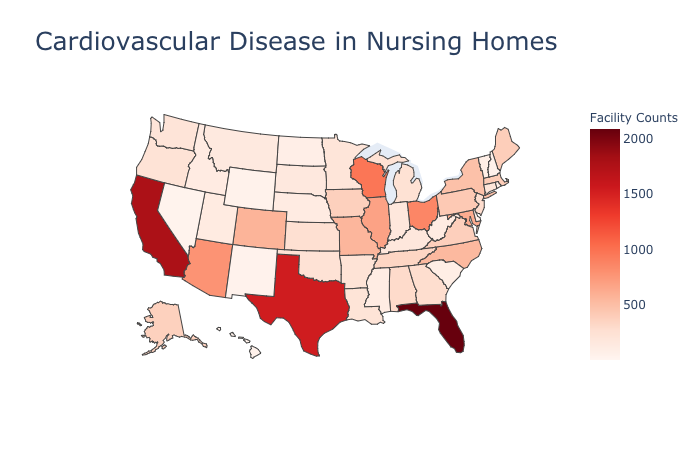

In [78]:
# Plot Map
map.show(renderer="png")
map.write_image("Nursing_Home_Cardio_count_map.png", scale=3)